In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# helper functionality
PI = np.pi

# get single index derivative for a given u initialization
def g(theta):
    return 1.0/(2 * PI) * (np.sin(theta) + (PI - theta) * np.cos(theta))

#
# returns the derivative
# np.array([dtheta, dr])
#
def derivative(theta, r, u_norm=1):
    dtheta = 1.0/(r * PI) * (theta - PI) * u_norm * np.sin(theta)
    dr = 2.0 * u_norm * g(theta) - r
    
    return np.array([dtheta, dr])

# Plot the vector field given by the gradient

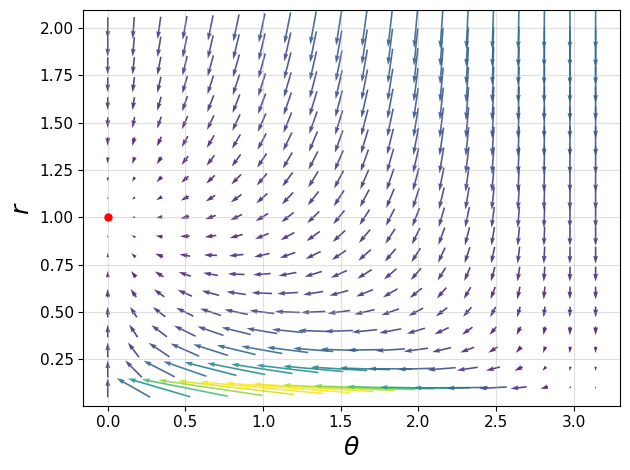

In [3]:
# plot the vector field given by the gradient
theta_min, theta_max = 0, PI
r_min, r_max = 1e-1, 2
N_points = 20

thetas = np.linspace(theta_min, theta_max, N_points)
rs = np.linspace(r_min, r_max, N_points)
X, Y = np.meshgrid(thetas, rs)

U, V = derivative(X, Y)
magnitude = np.sqrt(U**2 + V**2)

plt.quiver(X, Y, U, V, magnitude, cmap='viridis', 
           scale=25, pivot='mid', alpha=0.9)

# Add a colorbar
# plt.colorbar(label='Magnitude')

# Add grid, labels and title
plt.grid(alpha=0.4)
plt.xlabel(r'$\theta$', fontsize=18)
plt.ylabel(r'$r$', fontsize=18)

plt.tick_params(axis='x', labelsize=11)  # Change 14 to your desired font size
plt.tick_params(axis='y', labelsize=11)  # Change 14 to your desired font size


# Mark specific points on the plot
special_points = [
    (0, 1, 'Global Min', 'ro'),    # (x, y, label, marker_style)
]

for x_pos, y_pos, label, marker in special_points:
    plt.plot(x_pos, y_pos, marker, markersize=5)

# Optional: Add streamplot to show flow lines
# plt.streamplot(X, Y, U, V, color='grey', linewidth=0.5, 
#                density=1, arrowstyle='->', arrowsize=1.5)

plt.tight_layout()
plt.savefig('gradient_flow_map.png')
plt.show()

# Run SGD to collect the trajectories

In [4]:
import torch
import torch.nn as nn

import synthetic.models as syn_models
import synthetic.dataset as syn_data

import train

In [5]:
d=512
lr = 1e-4
num_iterations = int(5e4)
batch_size = 1

# do multiple runs
runs = 10

# initialize dataset
teacher_model = syn_models.SingleIndex(d, nn.ReLU(), u_norm = 1.0)

# initialize the dataset from the teacher model
dataset = syn_data.GaussianFunctionDataset(d, teacher_model)

# set the eval functions
def get_norm(m):
    return m.fc1.weight.norm().item()

def get_angle(m):
    n1 = m.fc1.weight.norm()
    n2 = teacher_model.fc1.weight.norm()
    ip = (m.fc1.weight * teacher_model.fc1.weight).sum()/ (n1 * n2)
    # make sure ip does not exceed 1 in magnitude
    if ip.norm() > 1.0:
        ip = ip /ip.norm()
    return torch.arccos(ip).item()

# do multiple runs
res = []
for r in range(runs):
    # initialize model to be trained
    model = syn_models.SingleIndex(d, nn.ReLU())

    loss_fn = nn.MSELoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    results = train.Trainer(model, dataset, 
                        loss_fn, optimizer,
                        batch_size, num_iterations,
                        {"test" : dataset},
                        eval_fns = {'r' : get_norm, 'theta' : get_angle},
                        eval_freq=1000).train()
    res.append(results)

--------------------Iteration 1--------------------
test loss: tensor([0.1721])
r value 1.0498727560043335
theta value 1.560944676399231
--------------------Iteration 1001--------------------
test loss: tensor([0.6650])
r value 0.9924697875976562
theta value 1.514022707939148
--------------------Iteration 2001--------------------
test loss: tensor([0.5100])
r value 0.9438301920890808
theta value 1.4722237586975098
--------------------Iteration 3001--------------------
test loss: tensor([0.3918])
r value 0.8878531455993652
theta value 1.4138779640197754
--------------------Iteration 4001--------------------
test loss: tensor([0.5045])
r value 0.8496295213699341
theta value 1.3582587242126465
--------------------Iteration 5001--------------------
test loss: tensor([0.1760])
r value 0.8143840432167053
theta value 1.3025957345962524
--------------------Iteration 6001--------------------
test loss: tensor([0.1111])
r value 0.7878142595291138
theta value 1.223214864730835
-------------------

--------------------Iteration 8001--------------------
test loss: tensor([0.2314])
r value 0.7391044497489929
theta value 1.133593201637268
--------------------Iteration 9001--------------------
test loss: tensor([0.3905])
r value 0.7214065194129944
theta value 1.0549780130386353
--------------------Iteration 10001--------------------
test loss: tensor([0.1216])
r value 0.7149587273597717
theta value 0.9877899289131165
--------------------Iteration 11001--------------------
test loss: tensor([0.0875])
r value 0.7111509442329407
theta value 0.9192946553230286
--------------------Iteration 12001--------------------
test loss: tensor([0.1837])
r value 0.7109950184822083
theta value 0.8425240516662598
--------------------Iteration 13001--------------------
test loss: tensor([0.3093])
r value 0.719776451587677
theta value 0.7689411640167236
--------------------Iteration 14001--------------------
test loss: tensor([0.1431])
r value 0.7301014065742493
theta value 0.7075377702713013
----------

--------------------Iteration 16001--------------------
test loss: tensor([0.1256])
r value 0.7771968841552734
theta value 0.48836496472358704
--------------------Iteration 17001--------------------
test loss: tensor([0.0601])
r value 0.789303719997406
theta value 0.44328227639198303
--------------------Iteration 18001--------------------
test loss: tensor([0.0824])
r value 0.8026472926139832
theta value 0.3994906544685364
--------------------Iteration 19001--------------------
test loss: tensor([0.0678])
r value 0.8177000880241394
theta value 0.362705796957016
--------------------Iteration 20001--------------------
test loss: tensor([0.1232])
r value 0.8316780924797058
theta value 0.32582738995552063
--------------------Iteration 21001--------------------
test loss: tensor([0.0371])
r value 0.8426389694213867
theta value 0.2965922951698303
--------------------Iteration 22001--------------------
test loss: tensor([0.0136])
r value 0.8538297414779663
theta value 0.2696058750152588
-----

--------------------Iteration 24001--------------------
test loss: tensor([0.0310])
r value 0.8468499779701233
theta value 0.2607312798500061
--------------------Iteration 25001--------------------
test loss: tensor([0.1221])
r value 0.8588132262229919
theta value 0.23466959595680237
--------------------Iteration 26001--------------------
test loss: tensor([0.0050])
r value 0.8706120848655701
theta value 0.21120348572731018
--------------------Iteration 27001--------------------
test loss: tensor([0.0415])
r value 0.8808590173721313
theta value 0.19172248244285583
--------------------Iteration 28001--------------------
test loss: tensor([0.0037])
r value 0.8906605243682861
theta value 0.17432595789432526
--------------------Iteration 29001--------------------
test loss: tensor([0.0078])
r value 0.8981966376304626
theta value 0.15913057327270508
--------------------Iteration 30001--------------------
test loss: tensor([0.0116])
r value 0.9054480791091919
theta value 0.1449667066335678
-

--------------------Iteration 32001--------------------
test loss: tensor([0.0048])
r value 0.9332607984542847
theta value 0.10921106487512589
--------------------Iteration 33001--------------------
test loss: tensor([0.0037])
r value 0.9389907121658325
theta value 0.09972427040338516
--------------------Iteration 34001--------------------
test loss: tensor([0.0109])
r value 0.9446950554847717
theta value 0.0907779410481453
--------------------Iteration 35001--------------------
test loss: tensor([0.0051])
r value 0.9498121738433838
theta value 0.08231927454471588
--------------------Iteration 36001--------------------
test loss: tensor([0.0002])
r value 0.9548607468605042
theta value 0.07506535202264786
--------------------Iteration 37001--------------------
test loss: tensor([0.0069])
r value 0.9590616226196289
theta value 0.06772048771381378
--------------------Iteration 38001--------------------
test loss: tensor([0.0093])
r value 0.9627577662467957
theta value 0.06183096021413803


--------------------Iteration 40001--------------------
test loss: tensor([0.0027])
r value 0.9666994214057922
theta value 0.054820649325847626
--------------------Iteration 41001--------------------
test loss: tensor([0.0015])
r value 0.9694787263870239
theta value 0.04987802729010582
--------------------Iteration 42001--------------------
test loss: tensor([0.0019])
r value 0.9721490144729614
theta value 0.045470479875802994
--------------------Iteration 43001--------------------
test loss: tensor([0.0012])
r value 0.9748229384422302
theta value 0.04142060875892639
--------------------Iteration 44001--------------------
test loss: tensor([0.0003])
r value 0.9771510362625122
theta value 0.03778493031859398
--------------------Iteration 45001--------------------
test loss: tensor([0.0015])
r value 0.9794886112213135
theta value 0.034142959862947464
--------------------Iteration 46001--------------------
test loss: tensor([0.0005])
r value 0.9813207983970642
theta value 0.03097728639841

--------------------Iteration 48001--------------------
test loss: tensor([0.0004])
r value 0.9848754405975342
theta value 0.024708334356546402
--------------------Iteration 49001--------------------
test loss: tensor([4.4432e-05])
r value 0.9864948987960815
theta value 0.022410929203033447
--------------------Iteration 1--------------------
test loss: tensor([0.7609])
r value 0.9721235036849976
theta value 1.6483081579208374
--------------------Iteration 1001--------------------
test loss: tensor([0.3857])
r value 0.9181607365608215
theta value 1.5988314151763916
--------------------Iteration 2001--------------------
test loss: tensor([0.7740])
r value 0.869141161441803
theta value 1.5524412393569946
--------------------Iteration 3001--------------------
test loss: tensor([0.6143])
r value 0.8228276371955872
theta value 1.4884638786315918
--------------------Iteration 4001--------------------
test loss: tensor([0.4471])
r value 0.7800225615501404
theta value 1.4248254299163818
-------

--------------------Iteration 6001--------------------
test loss: tensor([0.4645])
r value 0.7580651044845581
theta value 1.242309331893921
--------------------Iteration 7001--------------------
test loss: tensor([0.1297])
r value 0.743696928024292
theta value 1.1722261905670166
--------------------Iteration 8001--------------------
test loss: tensor([0.2906])
r value 0.7324931621551514
theta value 1.1046316623687744
--------------------Iteration 9001--------------------
test loss: tensor([0.3261])
r value 0.723027765750885
theta value 1.029969334602356
--------------------Iteration 10001--------------------
test loss: tensor([0.2206])
r value 0.7191656827926636
theta value 0.9396476149559021
--------------------Iteration 11001--------------------
test loss: tensor([0.1586])
r value 0.7177899479866028
theta value 0.8697991967201233
--------------------Iteration 12001--------------------
test loss: tensor([0.2437])
r value 0.7211880087852478
theta value 0.8024978041648865
--------------

--------------------Iteration 14001--------------------
test loss: tensor([0.0386])
r value 0.7305598258972168
theta value 0.6557568907737732
--------------------Iteration 15001--------------------
test loss: tensor([0.1564])
r value 0.739230215549469
theta value 0.6004831790924072
--------------------Iteration 16001--------------------
test loss: tensor([0.1066])
r value 0.7533321380615234
theta value 0.544037938117981
--------------------Iteration 17001--------------------
test loss: tensor([0.1091])
r value 0.7682393789291382
theta value 0.49058884382247925
--------------------Iteration 18001--------------------
test loss: tensor([0.0906])
r value 0.7810236215591431
theta value 0.44763511419296265
--------------------Iteration 19001--------------------
test loss: tensor([0.0184])
r value 0.7941054701805115
theta value 0.40742507576942444
--------------------Iteration 20001--------------------
test loss: tensor([0.0406])
r value 0.8056310415267944
theta value 0.36783522367477417
----

# Collect SGD Results

In [6]:
# collect results 
ts_sgd = None
rs_sgd = []
thetas_sgd = []
for results in res:
    evals = results['evals']
    ts_sgd = np.array([e[0] for e in evals])
    rs_sgd.append(np.array([e[2]['r'] for e in evals]))
    thetas_sgd.append(np.array([e[2]['theta'] for e in evals]))

rs_sgd = np.array(rs_sgd)
thetas_sgd = np.array(thetas_sgd)

r_median = np.median(rs_sgd, axis=0)
r_lower_bound = np.percentile(rs_sgd, 0.5, axis=0)  # 0.5th percentile
r_upper_bound = np.percentile(rs_sgd, 99.0, axis=0)  # 99.5th percentile

theta_median = np.median(thetas_sgd, axis=0)
theta_lower_bound = np.percentile(thetas_sgd, 0.5, axis=0)  # 0.5th percentile
theta_upper_bound = np.percentile(thetas_sgd, 99.0, axis=0)  # 99.5th percentile

# Solve the gradient flow ODE

In [7]:
from scipy.integrate import solve_ivp

# get the ODE solution
# y0 = [thetas_sgd[0], rs_sgd[0]]
y0 = [np.pi/2 , 1.0]
t_span = [0, lr * num_iterations]
sol = solve_ivp(lambda t, a: derivative(a[0], a[1]), t_span, y0, dense_output = True)

t_cont = np.linspace(t_span[0], t_span[1], 1000)
ts_ode = t_cont/lr
ys = sol.sol(t_cont)
thetas_ode = ys[0]
rs_ode = ys[1]

# Plot results

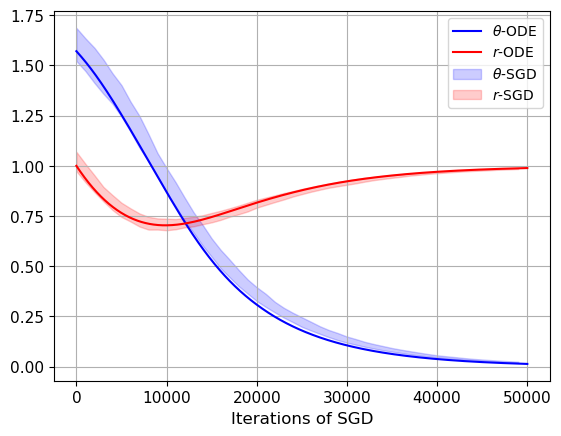

In [9]:
plt.grid()

plt.xlabel('Iterations of SGD', fontsize=12)
plt.tick_params(axis='x', labelsize=11)  # Change 14 to your desired font size
plt.tick_params(axis='y', labelsize=11)  # Change 14 to your desired font size

confidence = True

if not confidence:
    plt.plot(ts_sgd, thetas_sgd[0], 'b^', markersize=5, label = r'$\theta$-SGD')
plt.plot(ts_ode, thetas_ode, 'b-', label = r'$\theta$-ODE')

# ode plotting
if not confidence:
    plt.plot(ts_sgd, rs_sgd[0], 'r^', markersize=5, label = r'$r$-SGD')
plt.plot(ts_ode, rs_ode, 'r-', label = r'$r$-ODE')

# plot the confidence intervals
if confidence:
    plt.fill_between(ts_sgd, theta_lower_bound, theta_upper_bound, color='blue', alpha=0.2, label=r'$\theta$-SGD')
    plt.fill_between(ts_sgd, r_lower_bound, r_upper_bound, color='red', alpha=0.2, label=r'$r$-SGD')

plt.legend()
if confidence:
    plt.savefig('single_index_ode_confidence.png')
else:
    plt.savefig('single_index_ode_sgd.png')
plt.show()
